In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
problem = "knapsack"

In [12]:

def plot_fitness_old(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    ax = df_fitness.plot()
    ax.set_ylabel("Fitness")
    plt.grid()
    
def plot_fitness(df, df_names={}, title="", save_as=None):      
    
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    
    for name, label in df_names.items():
        plt.plot(df_fitness.index, df_fitness["fitness_" + name], label=label)
    
    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel("Iterations")
    plt.ylabel("Fitness") 
    plt.legend()
    plt.grid()
    
    if save_as:
        plt.savefig('images/'+save_as)
    
    plt.show()
    
def plot_evals(df):
    eval_col = [col for col in df if col.startswith('fevals')]
    df_feval = df[eval_col]
    ax = df_feval.plot(logy =True)
    ax.xlabel("Iterations")    
    ax.set_ylabel("Function Evaluations")
    plt.grid()
    
    

def plot_fitness_eval(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    ax = df_fitness.plot()
    ax.set_ylabel("Fitness")
    plt.grid()
    eval_col = [col for col in df if col.startswith('fevals')]
    df_feval = df[eval_col]
    ax = df_feval.plot(logy =True)
    ax.set_ylabel("Fevals")
    plt.grid()
    
def combine_charts(problem, option = ""):
    algos = ["RHC", "SA", "GA", "MIMIC"]
    
    file = problem + str(option)
    df_read = pd.read_csv("ABAGAIL/jython/data/" +problem+ "/"+ "RHC" +"-" + file+".csv")
    df= pd.DataFrame(index = df_read["iters"])
    
    for algo in algos:
        
        df_read = pd.read_csv("ABAGAIL/jython/data/"+problem+ "/" + algo +"-" + file+".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + algo)
        
        df = df.join(df_read)
    
    df.ffill(inplace= True)
    return df

def combineFiles(filenames={}, problem="knapsack"):
    
    filename1= list(filenames.keys())[0]
    
    df_read = pd.read_csv("ABAGAIL/jython/data/" + problem + "/"+ filename1 +".csv")
    df = pd.DataFrame(index = df_read["iters"])
    
    for name in filenames.keys():
        df_read = pd.read_csv("ABAGAIL/jython/data/"+ problem + "/" + name +".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + name)

        df = df.join(df_read)
        
    df.ffill(inplace= True)
    return df

def plot_time(df, name_dict, heading ="Bar chart", x_axis_label = "Algorithm"):
    x_labels, y_value = [], []
    df_max_time_fitness = pd.DataFrame(columns = [x_axis_label, "Max Fitness", "Time to Convergence", "Function Evals"])
    for name, label in name_dict.items():
        fittest_row = df.iloc[df["fitness_" + name].argmax()]
        max_time = fittest_row["time_" + name]
        max_fitness = fittest_row["fitness_" + name]
        max_fevals = fittest_row["fevals_" + name]
        df_max_time_fitness = df_max_time_fitness.append({x_axis_label:label, "Max Fitness" : max_fitness, "Time to Convergence":max_time
                                                         ,"Function Evals": max_fevals}, ignore_index = True)
        x_labels.append(label)
        y_value.append(max_time)
    bars = plt.bar(x_labels, y_value)
    
    plt.title(heading)
    plt.ylabel("Time")
    plt.xlabel(x_axis_label)
    plt.grid()
    plt.show()
    return df_max_time_fitness
    

In [13]:
def makeMapping(expt, algo, param_name, param_values):
    mapping = {}
    for param in param_values:
        mapping[expt+ "-" + algo + "-" + param_name + "=" + str(param)] = param_name + "=" + str(param)
    return mapping

# RHC

{'expt_Restarts-RHC-round=0': 'round=0', 'expt_Restarts-RHC-round=1': 'round=1', 'expt_Restarts-RHC-round=2': 'round=2', 'expt_Restarts-RHC-round=3': 'round=3', 'expt_Restarts-RHC-round=4': 'round=4'}


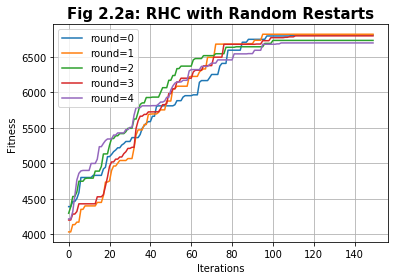

In [33]:
expt = "expt_Restarts"

mapping = makeMapping(expt, "RHC", "round", [i for i in range(5)])

print(mapping)

df = combineFiles(mapping)


plot_fitness(df[:150], mapping, title="Fig 2.2a: RHC with Random Restarts")

# SA

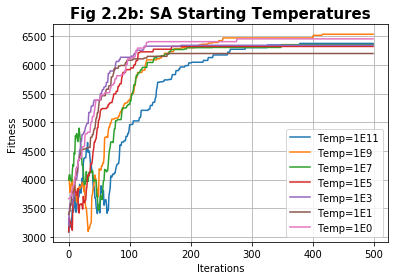

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


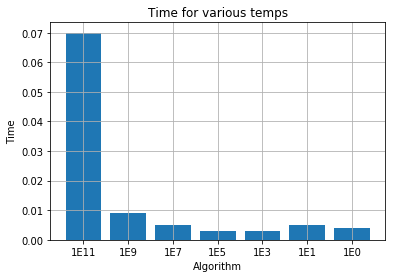

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,1E11,6386.410037,0.070,1651.0
1,1E9,6539.384051,0.009,788.0
2,1E7,6357.277067,0.005,683.0
3,1E5,6326.205111,0.003,470.0
4,1E3,6346.204421,0.003,452.0
5,1E1,6230.331012,0.005,1159.0
6,1E0,6473.600043,0.004,886.0


In [34]:
# Temp tuning. seed 54815, select 1E9
#Report
mapping = {
    "expt_Temp-SA-Temp=1E11_Decay=0.95"  : "Temp=1E11",
    "expt_Temp-SA-Temp=1E9_Decay=0.95"   : "Temp=1E9",
    "expt_Temp-SA-Temp=1E7_Decay=0.95"   : "Temp=1E7",
    "expt_Temp-SA-Temp=1E5_Decay=0.95"   : "Temp=1E5",
    "expt_Temp-SA-Temp=1E3_Decay=0.95"   : "Temp=1E3",
    "expt_Temp-SA-Temp=1E1_Decay=0.95"   : "Temp=1E1",
    "expt_Temp-SA-Temp=1E0_Decay=0.95"   : "Temp=1E0",
}

df = combineFiles(mapping)


plot_fitness(df[:500], mapping, title="Test")

mapping = {
    "expt_Temp-SA-Temp=1E11_Decay=0.95"  : "1E11",
    "expt_Temp-SA-Temp=1E9_Decay=0.95"   : "1E9",
    "expt_Temp-SA-Temp=1E7_Decay=0.95"   : "1E7",
    "expt_Temp-SA-Temp=1E5_Decay=0.95"   : "1E5",
    "expt_Temp-SA-Temp=1E3_Decay=0.95"   : "1E3",
    "expt_Temp-SA-Temp=1E1_Decay=0.95"   : "1E1",
    "expt_Temp-SA-Temp=1E0_Decay=0.95"   : "1E0",
}
plot_time(df, mapping, "Time for various temps")

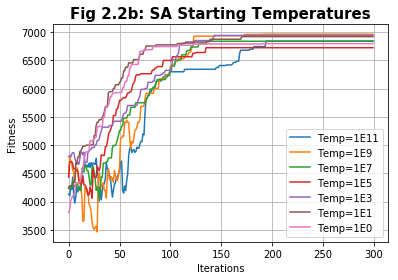

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


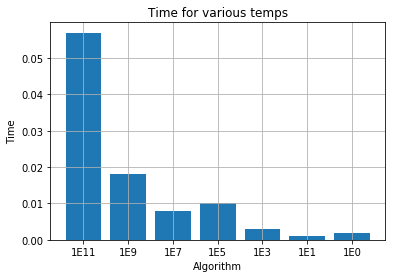

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,1E11,6921.448873,0.057,1204.0
1,1E9,7067.144512,0.018,1843.0
2,1E7,6936.628649,0.008,919.0
3,1E5,6750.185977,0.010,2608.0
4,1E3,6944.562091,0.003,346.0
5,1E1,6923.465549,0.001,381.0
6,1E0,6799.378115,0.002,427.0


In [45]:
# Temp tuning. seed 54815, select 1E9

#Report
mapping = {
    "expt_Temp_test2-SA-Temp=1E11_Decay=0.95"  : "Temp=1E11",
    "expt_Temp_test2-SA-Temp=1E9_Decay=0.95"   : "Temp=1E9",
    "expt_Temp_test2-SA-Temp=1E7_Decay=0.95"   : "Temp=1E7",
    "expt_Temp_test2-SA-Temp=1E5_Decay=0.95"   : "Temp=1E5",
    "expt_Temp_test2-SA-Temp=1E3_Decay=0.95"   : "Temp=1E3",
    "expt_Temp_test2-SA-Temp=1E1_Decay=0.95"   : "Temp=1E1",
    "expt_Temp_test2-SA-Temp=1E0_Decay=0.95"   : "Temp=1E0",
}

df = combineFiles(mapping)


plot_fitness(df[:300], mapping, title="Fig 2.2b: SA Starting Temperatures")

mapping = {
    "expt_Temp_test2-SA-Temp=1E11_Decay=0.95"  : "1E11",
    "expt_Temp_test2-SA-Temp=1E9_Decay=0.95"   : "1E9",
    "expt_Temp_test2-SA-Temp=1E7_Decay=0.95"   : "1E7",
    "expt_Temp_test2-SA-Temp=1E5_Decay=0.95"   : "1E5",
    "expt_Temp_test2-SA-Temp=1E3_Decay=0.95"   : "1E3",
    "expt_Temp_test2-SA-Temp=1E1_Decay=0.95"   : "1E1",
    "expt_Temp_test2-SA-Temp=1E0_Decay=0.95"   : "1E0",
}
plot_time(df, mapping, "Time for various temps")

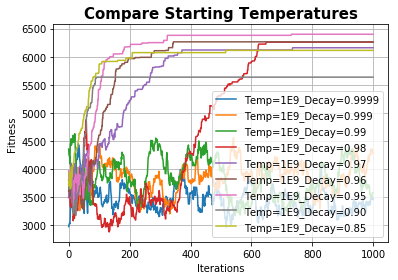

In [43]:
# Decay tuning, select 0.95
#Report
mapping = {
    "expt_Decay-SA-Temp=1E9_Decay=0.9999"  : "Temp=1E9_Decay=0.9999",
    "expt_Decay-SA-Temp=1E9_Decay=0.999"   : "Temp=1E9_Decay=0.999",
    "expt_Decay-SA-Temp=1E9_Decay=0.99"   : "Temp=1E9_Decay=0.99",
    "expt_Decay-SA-Temp=1E9_Decay=0.98"   : "Temp=1E9_Decay=0.98",
    "expt_Decay-SA-Temp=1E9_Decay=0.97"   : "Temp=1E9_Decay=0.97",
    "expt_Decay-SA-Temp=1E9_Decay=0.96"   : "Temp=1E9_Decay=0.96",
    "expt_Decay-SA-Temp=1E9_Decay=0.95"   : "Temp=1E9_Decay=0.95",
    "expt_Decay-SA-Temp=1E9_Decay=0.90"   : "Temp=1E9_Decay=0.90",
    "expt_Decay-SA-Temp=1E9_Decay=0.85"   : "Temp=1E9_Decay=0.85",
}

df = combineFiles( mapping)


plot_fitness(df[:1000], mapping, title="Compare Starting Temperatures")

# GA

{'expt_GA_pop_mate_size=20_mutation=5-GA-Pop=200': 'Pop=200', 'expt_GA_pop_mate_size=20_mutation=5-GA-Pop=250': 'Pop=250', 'expt_GA_pop_mate_size=20_mutation=5-GA-Pop=300': 'Pop=300', 'expt_GA_pop_mate_size=20_mutation=5-GA-Pop=350': 'Pop=350'}


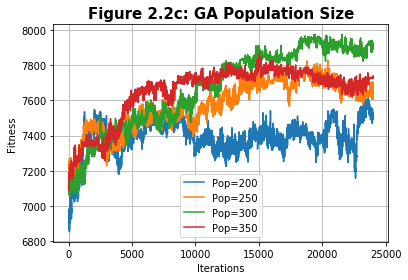

In [35]:
#Report
mate_size = 20
mutation = 5
expt = "expt_GA_pop" + "_mate_size="+ str(mate_size) + "_mutation=" + str(mutation)

mapping = makeMapping(expt, "GA", "Pop", [200,250,300, 350])

print(mapping)

df = combineFiles(mapping)


plot_fitness(df[:24000], mapping, title="Figure 2.2c: GA Population Size")

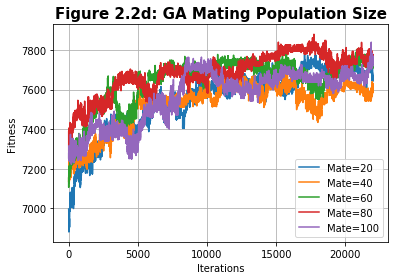

In [38]:
pop_size = 300
mutation = 5
expt = "expt_GA_mate" + "_pop_size="+ str(pop_size) + "_mutation=" + str(mutation)
mapping = makeMapping(expt, "GA", "Mate", [20,40,60, 80,100])

df = combineFiles(mapping)


plot_fitness(df[:22000], mapping, title="Figure 2.2d: GA Mating Population Size")

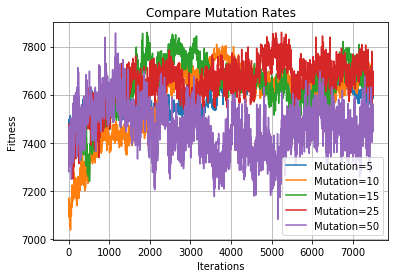

In [23]:
pop_size = 300
mate_pop = 50
expt = "expt_GA_mate" + "_pop_size=" + str(pop_size) + "_mate=" + str(mate_pop)

mapping = makeMapping(expt, "GA", "Mutation", [5,10,15,25,50])

df = combineFiles(mapping)


plot_fitness(df[:7500], mapping, title="Compare Mutation Rates")

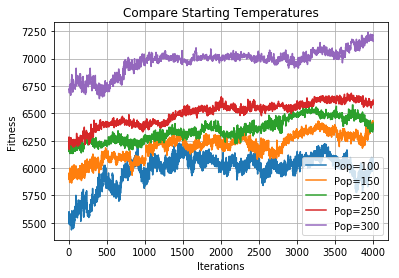

In [25]:
# Pop size tuning, choose 250

mapping = {
    "expt_GA_pop-GA-Pop=100"  : "Pop=100",
    "expt_GA_pop-GA-Pop=150"  : "Pop=150",
    "expt_GA_pop-GA-Pop=200"  : "Pop=200",
    "expt_GA_pop-GA-Pop=250"  : "Pop=250",
    "expt_GA_pop-GA-Pop=300"  : "Pop=300",
}

df = combineFiles(mapping)


plot_fitness(df[:40000], mapping, title="Compare Starting Temperatures")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


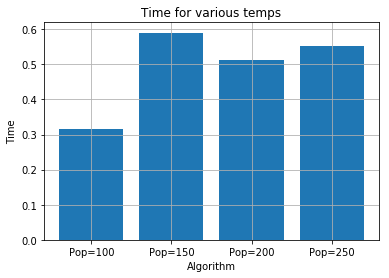

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,Pop=100,6227.080805,0.316,195400.0
1,Pop=150,6432.659691,0.590,464014.0
2,Pop=200,6576.369406,0.511,443284.0
3,Pop=250,6683.527107,0.552,446012.0


In [7]:
plot_time(df, mapping, "Time for various temps")

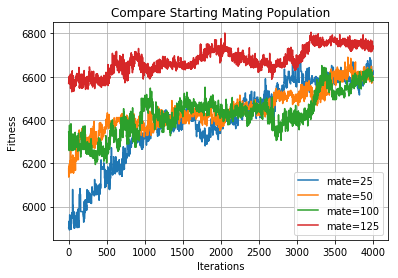

In [22]:
# mate size tuning, pop 250, select 125

mapping = {
    "expt_GA_mate-GA-mate=25"  : "mate=25",
    "expt_GA_mate-GA-mate=50"  : "mate=50",
    "expt_GA_mate-GA-mate=100"  : "mate=100",
    "expt_GA_mate-GA-mate=125"  : "mate=125",
}

df = combineFiles(mapping)


plot_fitness(df[:40000], mapping, title="Compare Starting Mating Population")

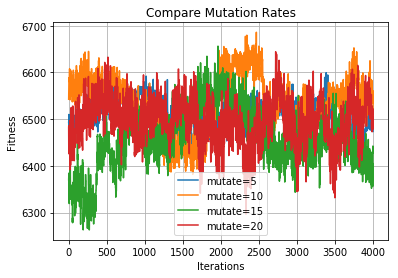

In [25]:
# mutate size tuning, pop 200,  mate = 50, select 10

mapping = {
    "expt_GA_mutate-GA-mutate=5"  : "mutate=5",
    "expt_GA_mutate-GA-mutate=10"  : "mutate=10",
    "expt_GA_mutate-GA-mutate=15"  : "mutate=15",
    "expt_GA_mutate-GA-mutate=20"  : "mutate=20",
}

df = combineFiles(mapping)


plot_fitness(df[:40000], mapping, title="Compare Mutation Rates")

# MIMIC

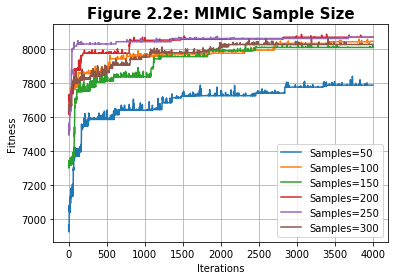

In [37]:
#REPORT
# Pop size tuning, select 200

mapping = {
    "expt_MIMIC_pop_new-MIMIC-Pop=50"  : "Samples=50",
    "expt_MIMIC_pop_new-MIMIC-Pop=100"  : "Samples=100",
    "expt_MIMIC_pop_new-MIMIC-Pop=150"  : "Samples=150",
    "expt_MIMIC_pop_new-MIMIC-Pop=200"  : "Samples=200",
    "expt_MIMIC_pop_new-MIMIC-Pop=250"  : "Samples=250",
    "expt_MIMIC_pop_new-MIMIC-Pop=300"  : "Samples=300",
}

df = combineFiles(mapping)


plot_fitness(df, mapping, title="Figure 2.2e: MIMIC Sample Size")

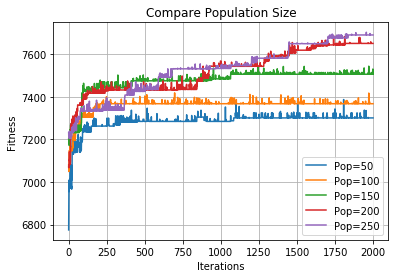

In [27]:
# Pop size tuning, select 200

mapping = {
    "expt_MIMIC_pop-MIMIC-Pop=50"  : "Pop=50",
    "expt_MIMIC_pop-MIMIC-Pop=100"  : "Pop=100",
    "expt_MIMIC_pop-MIMIC-Pop=150"  : "Pop=150",
    "expt_MIMIC_pop-MIMIC-Pop=200"  : "Pop=200",
    "expt_MIMIC_pop-MIMIC-Pop=250"  : "Pop=250",
}

df = combineFiles(mapping)


plot_fitness(df, mapping, title="Compare Population Size")

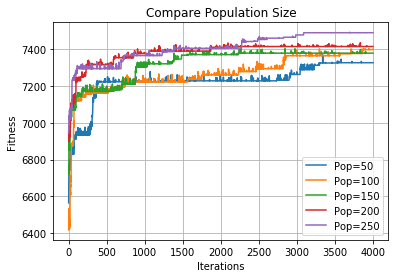

In [29]:
# Pop size tuning, select 200

mapping = {
    "expt_MIMIC_pop-MIMIC-Pop=50"  : "Pop=50",
    "expt_MIMIC_pop-MIMIC-Pop=100"  : "Pop=100",
    "expt_MIMIC_pop-MIMIC-Pop=150"  : "Pop=150",
    "expt_MIMIC_pop-MIMIC-Pop=200"  : "Pop=200",
    "expt_MIMIC_pop-MIMIC-Pop=250"  : "Pop=250",
}

df = combineFiles(mapping)


plot_fitness(df, mapping, title="Compare Population Size")

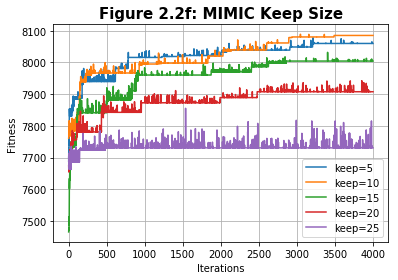

In [46]:
# Keep size tuning, keep 5 

mapping = {
    "expt_MIMIC_keep_new-MIMIC-keep=5"  : "keep=5",
    "expt_MIMIC_keep_new-MIMIC-keep=10"  : "keep=10",
    "expt_MIMIC_keep_new-MIMIC-keep=15"  : "keep=15",
    "expt_MIMIC_keep_new-MIMIC-keep=20"  : "keep=20",
    "expt_MIMIC_keep_new-MIMIC-keep=25"  : "keep=25",
}

df = combineFiles(mapping)


plot_fitness(df[:40000], mapping, title="Figure 2.2f: MIMIC Keep Size")

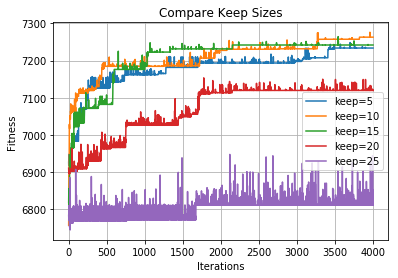

In [37]:
# Keep size tuning, keep 5 

mapping = {
    "expt_MIMIC_keep-MIMIC-keep=5"  : "keep=5",
    "expt_MIMIC_keep-MIMIC-keep=10"  : "keep=10",
    "expt_MIMIC_keep-MIMIC-keep=15"  : "keep=15",
    "expt_MIMIC_keep-MIMIC-keep=20"  : "keep=20",
    "expt_MIMIC_keep-MIMIC-keep=25"  : "keep=25",
}

df = combineFiles(mapping)


plot_fitness(df[:40000], mapping, title="Compare Keep Sizes")

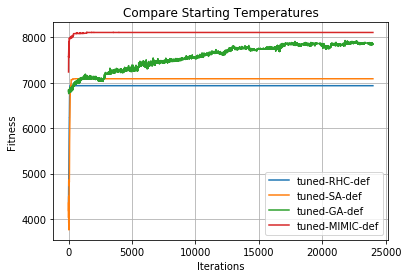

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


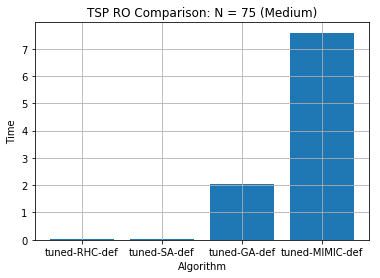

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,tuned-RHC-def,6935.671765,0.044,464.0
1,tuned-SA-def,7088.448443,0.012,893.0
2,tuned-GA-def,7930.282447,2.034,549364.0
3,tuned-MIMIC-def,8112.668934,7.584,981250.0


In [51]:
#N = 75, Weight 50
#Distribution.random.setSeed(54815)
#ABAGAILArrays.random.setSeed(1000)

mapping = {
    "expt_test_2-RHC-tuned"  : "tuned-RHC-def",
    "expt_test_2-SA-tuned"  : "tuned-SA-def",
    "expt_test_2-GA-tuned"  : "tuned-GA-def",
    "expt_test_2-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles(mapping)


plot_fitness(df[:24000], mapping, title="Compare Starting Temperatures")
plot_time(df, mapping, "TSP RO Comparison: N = 75 (Medium)")

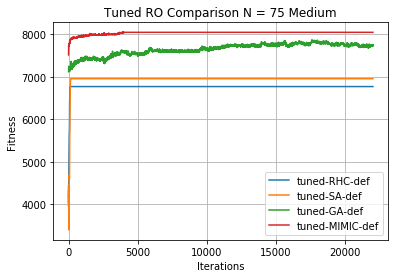

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


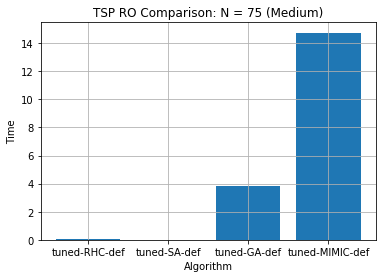

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,tuned-RHC-def,6771.155468,0.026,248.0
1,tuned-SA-def,6955.745056,0.006,530.0
2,tuned-GA-def,7909.248914,3.841,2511916.0
3,tuned-MIMIC-def,8049.435654,14.749,1915750.0


In [55]:
#Report
#N = 75, Weight 50
#Distribution.random.setSeed(54815)
#ABAGAILArrays.random.setSeed(1000)

mapping = {
    "expt_test_3-RHC-tuned"  : "tuned-RHC-def",
    "expt_test_3-SA-tuned"  : "tuned-SA-def",
    "expt_test_3-GA-tuned"  : "tuned-GA-def",
    "expt_test_3-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles(mapping)


plot_fitness(df[:22000], mapping, title="Tuned RO Comparison N = 75 Medium")
plot_time(df, mapping, "TSP RO Comparison: N = 75 (Medium)")

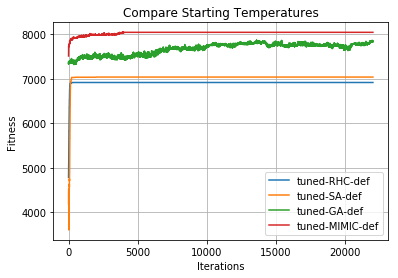

In [49]:
#N = 75, Weight 50
#Distribution.random.setSeed(54815)
#ABAGAILArrays.random.setSeed(1000)

mapping = {
    "expt_test_4-RHC-tuned"  : "tuned-RHC-def",
    "expt_test_4-SA-tuned"  : "tuned-SA-def",
    "expt_test_4-GA-tuned"  : "tuned-GA-def",
    "expt_test_4-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles(mapping)


plot_fitness(df[:22000], mapping, title="Compare Starting Temperatures")

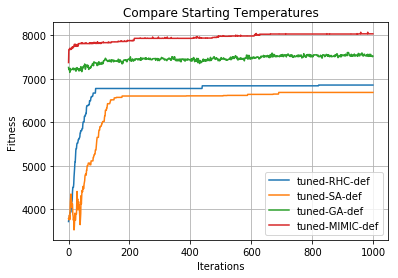

In [5]:
#N = 75, Weight 50
#Distribution.random.setSeed(54815)
#ABAGAILArrays.random.setSeed(1000)

mapping = {
    "expt_tuned-RHC-tuned"  : "tuned-RHC-def",
    "expt_tuned-SA-tuned"  : "tuned-SA-def",
    "expt_tuned-GA-tuned"  : "tuned-GA-def",
    "expt_tuned-MIMIC-tuned"  : "tuned-MIMIC-def",
}

df = combineFiles(mapping)


plot_fitness(df[:1000], mapping, title="Compare Starting Temperatures")

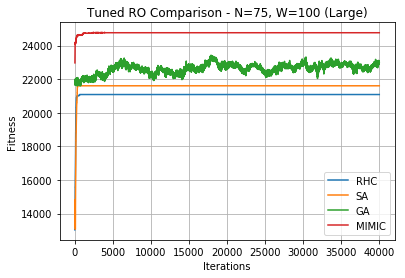

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


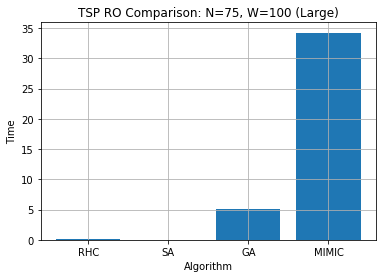

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,RHC,21085.841143,0.056,895.0
1,SA,21605.926995,0.013,729.0
2,GA,23418.689373,5.055,2384400.0
3,MIMIC,24794.492775,34.244,2025500.0


In [57]:
#N = 150, Weight 100
mapping = {
    "expt_tuned_large-RHC-tuned"  : "RHC",
    "expt_tuned_large-SA-tuned"  : "SA",
    "expt_tuned_large-GA-tuned"  : "GA",
    "expt_tuned_large-MIMIC-tuned"  : "MIMIC",
}

df = combineFiles( mapping)


plot_fitness(df[:40000], mapping, title="Tuned RO Comparison - N=75, W=100 (Large)")
plot_time(df, mapping, "TSP RO Comparison: N=75, W=100 (Large)")

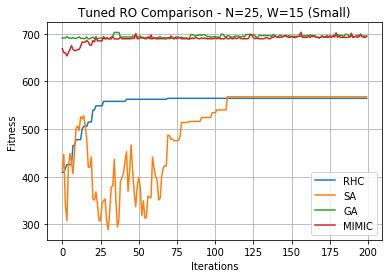

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:86: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


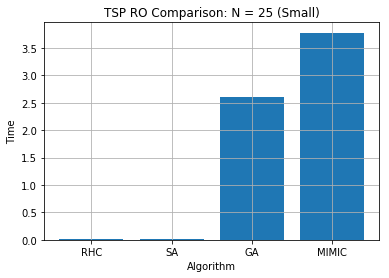

,Algorithm,Max Fitness,Time to Convergence,Function Evals
0,RHC,564.631180,0.020,150.0
1,SA,576.973442,0.009,714.0
2,GA,723.715466,2.613,4022591.0
3,MIMIC,723.916874,3.778,1840750.0


In [56]:
#N = 25, Weight 15
mapping = {
    "expt_tuned_small-RHC-tuned"  : "RHC",
    "expt_tuned_small-SA-tuned"  : "SA",
    "expt_tuned_small-GA-tuned"  : "GA",
    "expt_tuned_small-MIMIC-tuned"  : "MIMIC",
}

df = combineFiles( mapping)


plot_fitness(df[:200], mapping, title="Tuned RO Comparison - N=25, W=15 (Small)")
plot_time(df, mapping, "TSP RO Comparison: N = 25 (Small)")